In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [246]:
master=pd.read_excel('master_dup_removed.xlsx')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29


In [15]:
master.shape

(1362, 136)

## Notes about the data
1- Sex column has F-M and female-male

2- Age doesn't look normally distributed --> Scaling

3- Is education level proportional to general population? Does it matter?

4- NEO-E Skewed norm dist

5- Only NeoC has a null value (1)


In [16]:
master['lh_bankssts_thickness'].isnull().sum()

0

<AxesSubplot:xlabel='NEO_N', ylabel='Count'>

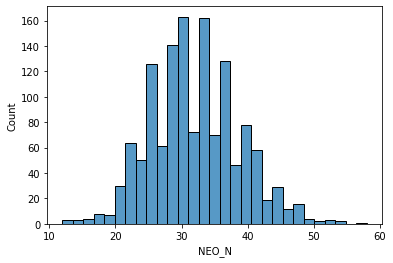

In [17]:
sns.histplot(master['NEO_N'])

In [18]:
master.describe()

,age,BMI,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
count,1353.000000,1353.000000,1362.000000,1362.000000,1362.000000,1362.000000,1361.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,22.611604,23.452328,32.044053,42.367841,41.140969,41.480910,39.625276,2.612562,2.834280,2.668168,...,624.399192,963.657562,505229.693427,473428.713726,60587.881791,682682.797686,0.982964,21.950808,21.265786,43.216593
std,1.768582,4.461636,6.673963,5.752341,6.254869,5.790108,6.724346,0.150417,0.215096,0.148599,...,154.322225,158.217013,50983.978778,56343.418310,5150.041764,63571.059593,0.113214,12.559680,11.654838,23.134134
min,18.250000,0.000000,12.000000,19.000000,22.000000,25.000000,19.000000,2.112000,2.226000,2.214000,...,319.900000,401.700000,365486.667586,342083.173660,46019.000000,504960.667586,0.839635,0.000000,0.000000,3.000000
25%,21.250000,21.000000,27.000000,38.000000,37.000000,37.250000,35.000000,2.509000,2.685250,2.565000,...,508.750000,853.950000,469216.989462,432865.675953,56841.250000,636360.663303,0.900092,13.000000,12.000000,26.000000
50%,22.500000,23.000000,32.000000,43.000000,41.000000,42.000000,39.000000,2.611000,2.823000,2.671000,...,600.150000,951.350000,502938.890146,468810.834881,60534.500000,679474.039146,0.930576,20.000000,20.000000,41.500000
75%,24.000000,25.000000,36.000000,47.000000,46.000000,46.000000,44.000000,2.709000,2.968750,2.770750,...,717.075000,1057.650000,538850.629653,509955.141002,64040.250000,727203.990361,1.053637,29.000000,28.000000,56.000000
max,26.250000,47.000000,58.000000,58.000000,58.000000,58.000000,59.000000,3.164000,3.663000,3.169000,...,1482.400000,1614.400000,687593.232218,666177.675324,79412.000000,900769.417400,1.430946,120.000000,106.000000,226.000000


<AxesSubplot:xlabel='NEO_C', ylabel='Count'>

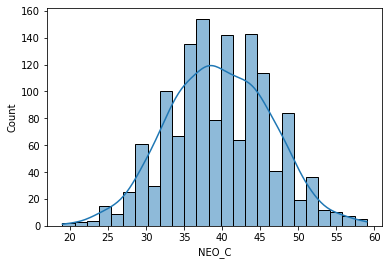

In [43]:
sns.histplot(master['NEO_C'],kde='True')

In [54]:
master['NEO_C'].mean()


39.62527553269655

In [55]:
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,cat_NEO_N
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,Average N
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,Average N
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,Average N
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,Average N
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,Average N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,Above Average N
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,Average N
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,Average N
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,Average N


## Finding clusters

In [104]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


In [247]:
clusters = KMeans(n_clusters=5)

In [248]:
y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35,48.0,39,44,37
1,27,34.0,48,53,40
2,35,38.0,37,40,43
3,29,41.0,48,47,41
4,26,45.0,38,35,40
...,...,...,...,...,...
1357,40,32.0,38,39,47
1358,28,40.0,34,41,48
1359,27,45.0,41,44,46
1360,35,41.0,45,32,44


In [249]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
y=pd.DataFrame(imputer.fit_transform(y),columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35.0,48.0,39.0,44.0,37.0
1,27.0,34.0,48.0,53.0,40.0
2,35.0,38.0,37.0,40.0,43.0
3,29.0,41.0,48.0,47.0,41.0
4,26.0,45.0,38.0,35.0,40.0
...,...,...,...,...,...
1357,40.0,32.0,38.0,39.0,47.0
1358,28.0,40.0,34.0,41.0,48.0
1359,27.0,45.0,41.0,44.0,46.0
1360,35.0,41.0,45.0,32.0,44.0


In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y)


StandardScaler()

In [251]:
y = pd.DataFrame(scaler.transform(y), columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.443070,1.246413,-0.428631,0.283842,-0.662282
1,-0.756058,-0.837097,1.126315,1.848997,-0.182480
2,0.443070,-0.241809,-0.774175,-0.411782,0.297323
3,-0.456276,0.204658,1.126315,0.805561,-0.022546
4,-0.905949,0.799947,-0.601403,-1.281313,-0.182480
...,...,...,...,...,...
1357,1.192525,-1.134742,-0.601403,-0.585688,0.937059
1358,-0.606167,0.055836,-1.292490,-0.237876,1.096993
1359,-0.756058,0.799947,-0.083088,0.283842,0.777125
1360,0.443070,0.204658,0.607999,-1.803031,0.457257


In [252]:
clusters.fit(y)

KMeans(n_clusters=5)

In [253]:
clusters.fit_transform(y)

array([[2.84496683, 2.0793451 , 1.70883533, 1.90542709, 2.16852542],
       [3.21036075, 2.15639431, 2.41053636, 3.45188453, 2.86563512],
       [1.49339867, 2.17406711, 2.55703558, 1.38867493, 1.06166009],
       ...,
       [2.67169394, 0.92788509, 1.76809498, 2.44476843, 1.9480359 ],
       [1.84326229, 2.6513476 , 2.99151617, 1.65841885, 2.99065095],
       [2.06856002, 1.45306368, 1.58239966, 1.89802742, 1.41277363]])

In [254]:
centers=pd.DataFrame(scaler.inverse_transform(clusters.cluster_centers_),columns=y.columns)
centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,39.137168,33.407080,43.429204,39.323009,45.261062
1,29.545151,43.618729,45.170569,46.240803,45.712375
2,25.808765,45.000000,44.027888,44.637450,35.521912
3,33.986755,39.013245,40.609272,36.430464,36.417219
4,32.475352,36.267606,34.721831,45.021127,43.038732


In [255]:
clusters.labels_

array([2, 1, 4, ..., 1, 3, 4], dtype=int32)

In [256]:
target_label=clusters.labels_

In [257]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,2
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,4
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,4
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,3


In [258]:
master.target.value_counts()

3    302
1    299
4    284
2    251
0    226
Name: target, dtype: int64

In [269]:
from sklearn.mixture import GaussianMixture
gaussian_clusters=gm = GaussianMixture(n_components=5, random_state=0)

In [270]:
gaussian_clusters.fit(y)

GaussianMixture(n_components=5, random_state=0)

In [271]:
gaussian_clusters.means_

array([[ 0.36939452,  0.03377824,  0.70017181, -0.1186042 ,  0.47495203],
       [-0.0879497 , -0.42000532, -0.61562154,  0.46988289,  0.27763802],
       [-0.10964357,  0.12263497, -0.14701913, -0.57167953, -0.61590809],
       [-0.798865  ,  0.83230298,  0.53962362,  0.71891071, -0.06264678],
       [ 1.02353298, -0.71047431, -0.27873605, -0.74534831,  0.09162942]])

In [273]:
gaussian_centers=pd.DataFrame(scaler.inverse_transform(gaussian_clusters.means_),columns=y.columns)
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,34.508473,39.851787,45.533492,41.685840,44.110641
1,31.457295,36.802621,37.917704,45.069776,42.876921
2,31.312564,40.448853,40.629966,39.080553,37.289959
3,26.714415,45.217417,44.604242,46.501743,40.749266
4,38.872565,34.850835,39.867591,38.081918,41.713889


In [280]:
gaussian_target=gaussian_clusters.predict(y)

In [281]:
master['gaussian_target']=gaussian_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,2,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,4,1
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1,3
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,4,1
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,3,2


## First model

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

In [213]:
gbs=GradientBoostingClassifier()

In [182]:
master=master.drop(['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O','participant_id'],axis=1)

In [190]:
########## STANDARD PIPELINE ##########

from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator

## NUMERICAL TRANSFORMER - IMPUTER AND SCALER
num_transformer = Pipeline([
    ('simple_imputer', SimpleImputer()),
    ('r_scaler', StandardScaler())
])

## CATEGORICAL TRANSFORMER - ONE HOT ENCODER
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

## BUILDING THE PREPROCESSOR
preprocessor = ColumnTransformer([
        ('num_transformer', num_transformer, make_column_selector(dtype_include=['int64','int32','float64'])),
        ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object','O']))],
remainder='passthrough')


## FINAL PIPELINE
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('GBS', gbs)
])


## Scoring Metric Appropriate For The Task (Precision), a high precision will have no false alarms
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer()),
                                                                  ('r_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11f1c3a60>),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11ecda3a0>)])),
                ('GBS', GradientBoostingClassifier(learning_rate=0.01))])

In [216]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


random_search = GridSearchCV(
    final_pipe,
    param_grid={
        'preprocessor__num_transformer__simple_imputer__strategy': ['median'],
        'GBS__learning_rate': [0.001,0.01,0.1],
        'GBS__n_estimators': [30,50,100]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [198]:
y=master['target']
y

0       2
1       0
2       2
3       2
4       0
       ..
1357    4
1358    1
1359    4
1360    3
1361    4
Name: target, Length: 1362, dtype: int32

In [204]:
X=master.drop('target',axis=1)
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,F,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,21.00,F,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,23.00,M,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,23.50,F,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,21.75,M,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65


In [206]:
X['sex'].replace('F','female',inplace=True)

In [207]:
X['sex'].replace('M','male',inplace=True)
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65


In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [215]:
random_search.fit(X_train,y_train)

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/uti

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/uti

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('r_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x11f1c3a60>),
                                                                        ('cat_transformer',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x11ecda3a0>)])),
                                       ('GBS',
                                        GradientBoostingClassifier(learning_rate=0.01))]),
             n_jobs=-1,
             param_grid={'GBS__learning_rate': [0.001, 0.01, 0.1],
                         'GBS__n_estimators': [30, 50, 100],
                         'preprocessor__num_transformer__simple_imputer__strategy': ['median']},
             scoring='precision')

In [218]:
from sklearn.metrics import accuracy_score

In [219]:
a=accuracy_score()

TypeError: accuracy_score() missing 2 required positional arguments: 'y_true' and 'y_pred'